# Linear Regression on Fish dataset

<b>Load Dataset</b>

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\santhosh\Downloads\Fish.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


<b> Data Cleaning </b>

In [7]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.rename(columns = {'Weight':'Weight(grms)', 'Length1':'First_Length(cm)', 'Length2':'Second_Length(cm)', 'Length3':'Third_Length(cm)', 'Height': 'Height(cm)', 'Width': 'Width(cm)'}, inplace = True)
data.columns

Index(['Species', 'Weight(grms)', 'First_Length(cm)', 'Second_Length(cm)',
       'Third_Length(cm)', 'Height(cm)', 'Width(cm)'],
      dtype='object')

<b> Exploratory Data Analysis </b>

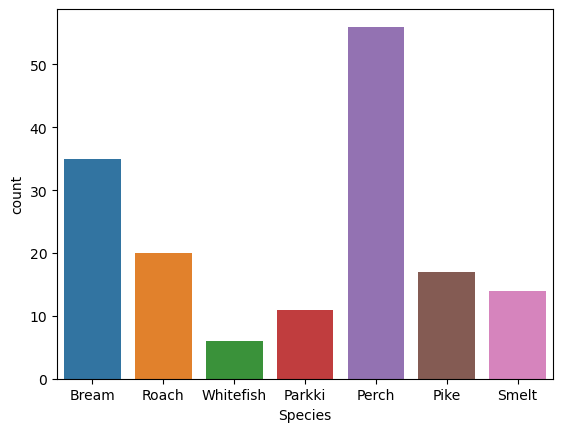

In [10]:
# finding Count plot for Categorical columns
sns.countplot(x='Species', data=data)
plt.show()

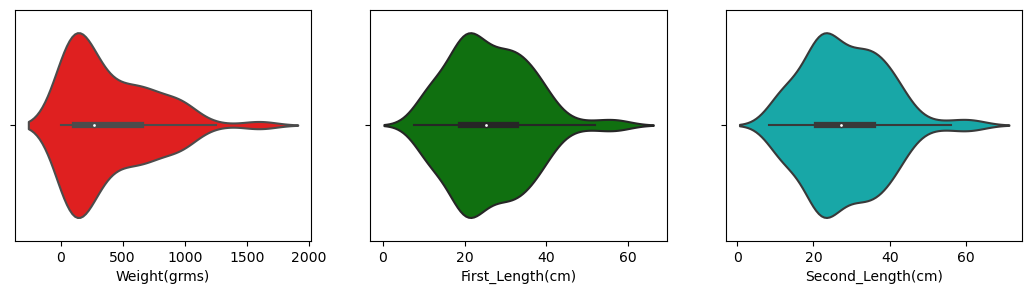

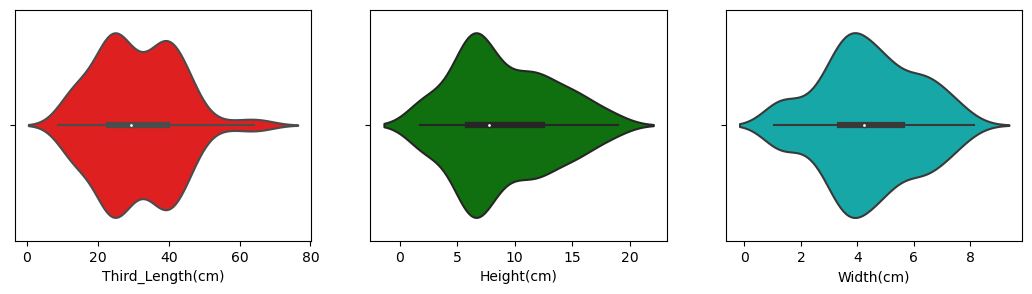

In [11]:
num_cols = ['Weight(grms)', 'First_Length(cm)', 'Second_Length(cm)', 'Third_Length(cm)', 'Height(cm)','Width(cm)']
i=0
while i < 4:
    fig = plt.figure(figsize = [13,3])

    plt.subplot(1,3,1)
    sns.violinplot(x=num_cols[i], data=data, color='r')
    i += 1

    plt.subplot(1,3,2)
    sns.violinplot(x=num_cols[i], data=data, color='g')
    i += 1

    plt.subplot(1,3,3)
    sns.violinplot(x=num_cols[i], data=data, color='c')
    i += 1
plt.show()

In [12]:
#Droping the string values
data.drop(labels = 'Species', axis = 1, inplace = True)

In [13]:
data = pd.get_dummies(data = data,drop_first = True) # changing the categorical to dummy variables.

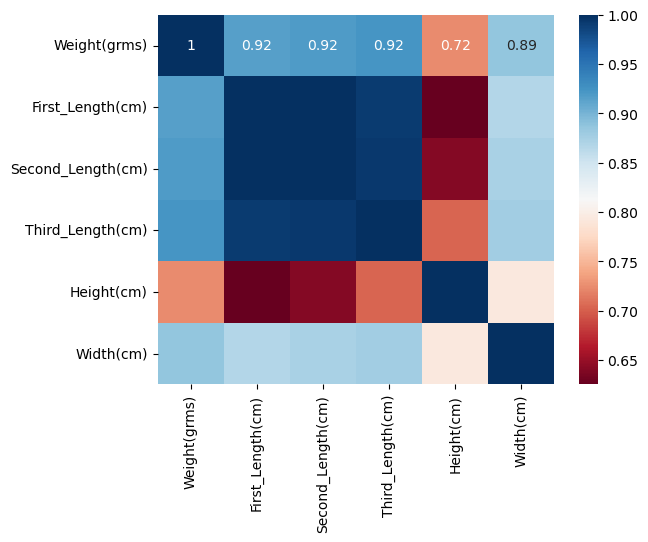

In [14]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [18]:
data.corr()['Weight(grms)']

Weight(grms)         1.000000
First_Length(cm)     0.915712
Second_Length(cm)    0.918618
Third_Length(cm)     0.923044
Height(cm)           0.724345
Width(cm)            0.886507
Name: Weight(grms), dtype: float64

Train-Test Split

In [19]:
# Separating target variable and its features
x = data.drop('Weight(grms)',axis=1)
y = data['Weight(grms)']

In [20]:
x.head()

,First_Length(cm),Second_Length(cm),Third_Length(cm),Height(cm),Width(cm)
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [21]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight(grms), dtype: float64

<b>Train- Test Split</b>

In [22]:
#accesing for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y_test: ", y_test.shape)

x train:  (127, 5)
x test:  (32, 5)
y train:  (127,)
y_test:  (32,)


<b> Applying Algorithm </b>

In [23]:
#Create a Linear Regression model
model = LinearRegression()
#Train the model on the training data
model.fit(X_train,y_train)
# Make prediction on the test data
y_pred = model.predict(X_test)

In [24]:
# print the model coeffecients and intercept
print("coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

coefficients:  [ 56.90591757  -4.63465655 -28.54481968  24.25584123  43.68347751]
Intercept:  -484.85364947368276


In [29]:
# finding the root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root mean Squared Error: ", rmse)

Root mean Squared Error:  132.30626579806096


In [30]:
# finding the Error
error = y_test-y_pred
print(error)

29     217.737037
42     -17.502384
14      33.385897
91     -62.713345
81     -18.058491
19      29.440040
44     -57.007165
11     -30.258227
40    -153.997403
97    -104.672167
89     -41.986321
94     -39.200834
73     115.726708
105   -134.276248
59      93.765077
90     -78.967371
66     -49.179096
54    -121.875294
108   -129.237726
100   -110.394910
153    174.698006
35     118.874097
51    -107.451299
5       -7.254021
84     -30.058084
31     169.053804
16     109.787860
145    228.093435
143    451.822756
93     -55.078402
127     45.396614
103   -111.372653
Name: Weight(grms), dtype: float64


<b>Predicted Value</b>

<Axes: ylabel='Weight(grms)'>

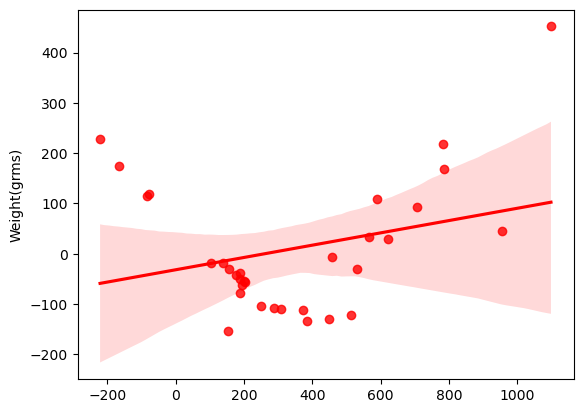

In [28]:
# ploting a predicted value
sns.regplot(x = y_pred, y = error, data = data, color='r') # exact fitline